In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

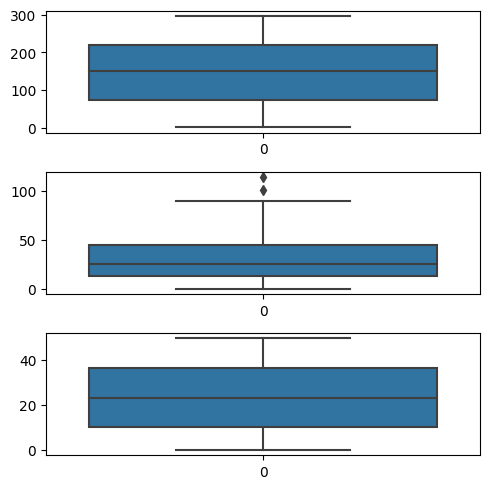

In [11]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

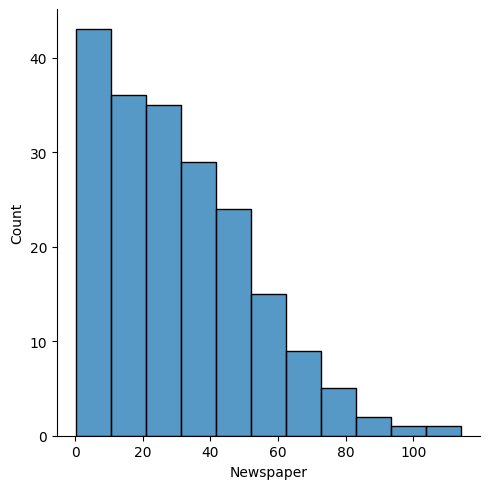

In [12]:
sns.displot(df['Newspaper'])

# New Section

In [13]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [14]:
lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [15]:
data = df.copy()

In [16]:
data.loc[data['Newspaper']>=93,  'Newspaper']=93

<Axes: >

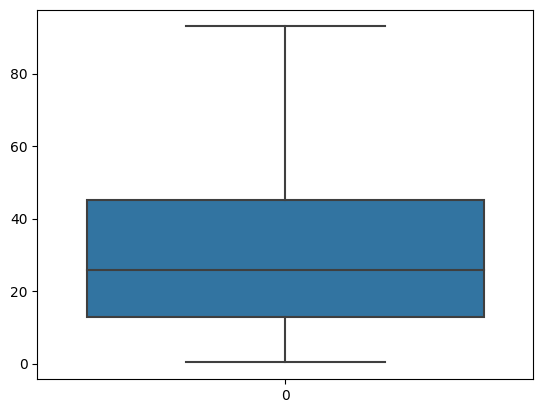

In [17]:
sns.boxplot(data['Newspaper'])

<Axes: >

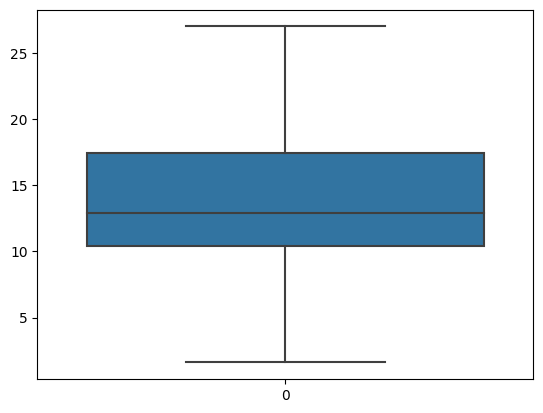

In [18]:
sns.boxplot(data['Sales'])

<Axes: >

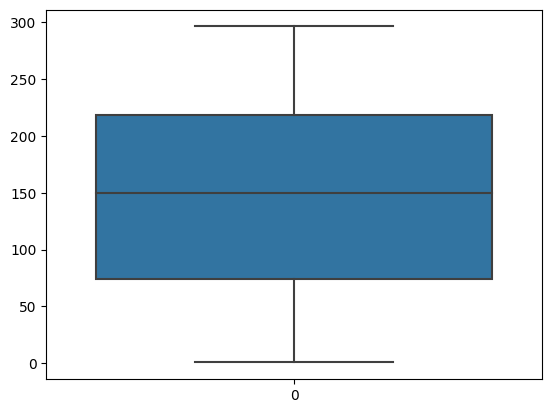

In [19]:
sns.boxplot(data['TV'])

<Axes: >

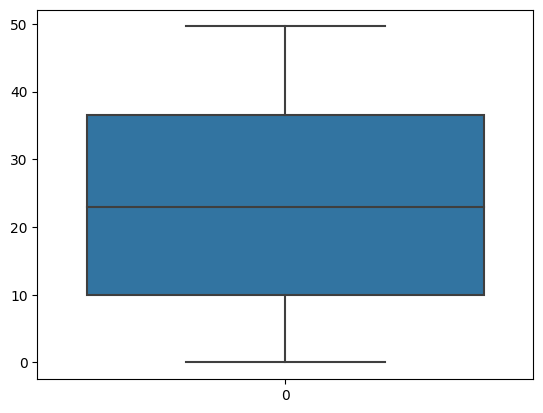

In [20]:
sns.boxplot(data['Radio'])

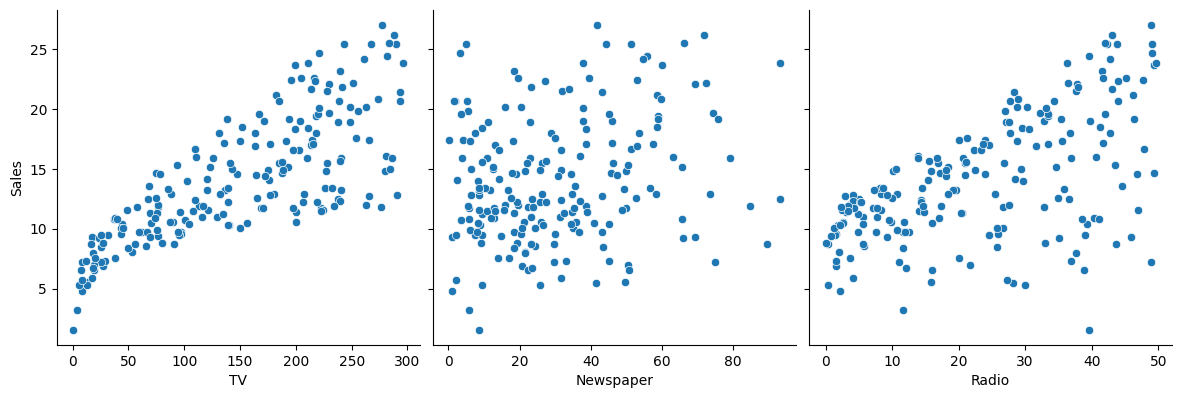

In [21]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'],y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

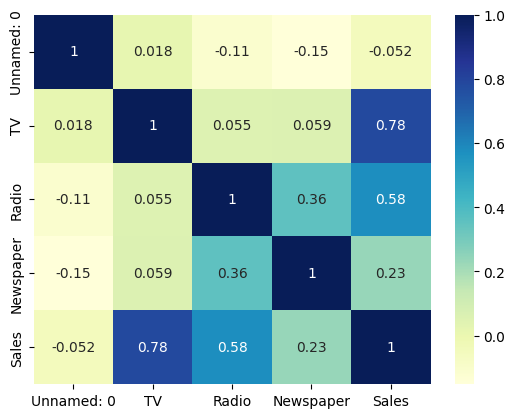

In [22]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot= True)
plt.show()

In [23]:
importatnt_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)
print(importatnt_features)

['TV', 'Radio', 'Sales']


In [24]:
x = data['TV']
y = data['Sales']

In [25]:
x = x.values.reshape(-1,1)
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [26]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [27]:
print(x.shape, y.shape)

(200, 1) (200,)


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [30]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [41]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn

KNeighborsRegressor()

In [32]:
knn_train_pred = knn.predict(x_train)

In [34]:
knn_test_pred = knn.predict(x_test)

In [35]:
print(knn_train_pred,knn_test_pred)

[16.26 17.78  7.94 17.46 17.16 14.08 19.46  9.94 19.96 14.08 17.98 17.78
 18.54 17.56 13.74 17.78 15.32 15.14 20.98 11.1  17.56 15.14  6.68 11.66
 11.16 11.36 21.4  22.54  7.94 15.92 15.14  5.74 12.36 12.28  5.98  7.
 11.44  7.88 17.46  7.88  7.   12.18 22.08 11.32 15.32 21.4   9.86 17.16
 21.3  15.36 21.7  16.52 20.5  17.34 17.42  4.84 18.5  17.56 15.86  6.68
 20.2  15.86 17.46 15.36 18.16 19.16 21.56 15.36 16.88  9.94 19.72  7.88
  9.7   7.72 11.78 16.64 14.98 15.14 12.9  18.5  18.16 13.74 10.84  9.94
  7.72 17.78 12.38 12.9  11.44 19.4  12.6  17.26 16.52 16.14 17.4  16.64
 16.04 13.74  5.98  8.66 11.28 19.72  9.94  5.98 17.86  9.44 18.54 15.92
 21.3  16.52  9.96 20.5  11.16 16.14 15.46 21.4   9.92 19.08 17.02  9.7
 11.66 16.14 21.06 11.44 16.36  5.98 20.98 13.34 16.14 12.04 20.98 17.46
 16.64 11.78] [ 9.46 11.44 17.46  4.84 15.34  4.84  9.96  7.72 11.78 12.28 11.32 11.78
 21.06 21.56 11.32 15.34 12.38 13.74 21.56 12.36 11.1  11.66 11.36  9.86
 11.66 14.08 17.34 18.16 11.44 11.44 18.

In [36]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [45]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.3781135574910657
RMSE: 3.278062066082781


In [38]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.671511,0.378114,3.278062,0.293397


In [40]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [42]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)
print(svr_train_pred,svr_test_pred)

[16.34573194 19.7011839   7.84240395 18.35603515 16.4598994  13.46346022
 17.84191341  8.47008707 17.83654196 13.59567492 19.75280775 19.70560626
 16.70009732 18.91354741 13.71373553 18.922467   14.27189228 16.78223225
 19.66211152 12.12253771 18.88662473 16.771275    7.52573946 11.4594125
 11.63873356 10.23495254 19.84807155 19.88250332  8.03000474 18.04972952
 16.82059547  7.49610839 11.17570177 12.77648891  7.42251115  7.62890991
 10.64711682  7.88693861 18.29982656  7.95675366  7.62890991 11.11922117
 19.86603726 10.08048144 14.18136167 19.86369532  8.7934177  16.48713074
 19.35738977 15.48893282 19.26566516 17.21027678 17.5659136  17.93825567
 16.01082749  7.37037474 17.75035358 18.9090773  15.23161325  7.5279675
 17.63661458 15.28916652 18.3407514  15.52060893 18.8366438  17.42399621
 19.88059616 18.2276486  18.54635319  9.43323502 19.05704942  7.98484314
  8.71456961  7.70009777 10.48038796 16.19946904 13.18139997 16.82059547
 13.84223115 17.7287392  18.79980472 13.66448056 11.9

In [44]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5614603920108603
RMSE: 2.7527453624275355


In [46]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.671511,0.378114,3.278062,0.293397
1,Support Vector Machine,0.600708,0.561460,2.752745,0.039248
2,Support Vector Machine,0.600708,0.561460,2.752745,0.039248
3,K-Nearest Neighbors,0.671511,0.378114,3.278062,0.293397


In [47]:
import statsmodels.api as sm

In [48]:
x_train_constant = sm.add_constant(x_train)

In [49]:
model = sm.OLS(y_train,x_train_constant).fit()

In [50]:
model.params

const    6.868371
x1       0.049732
dtype: float64

In [51]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     204.9
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           1.23e-28
Time:                        19:11:19   Log-Likelihood:                -356.60
No. Observations:                 134   AIC:                             717.2
Df Residuals:                     132   BIC:                             723.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.8684      0.623     11.019      0.0

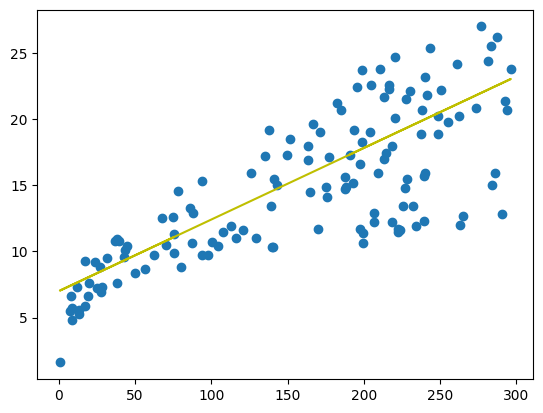

In [53]:
plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [54]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

187    0.927867
54     0.267065
12     1.148010
23    -2.722159
85    -1.276570
         ...   
161    2.169607
30    -0.034838
0      3.788324
154   -0.608018
82     0.686819
Name: Sales, Length: 134, dtype: float64

In [55]:
y_train_pred

array([16.37213293, 19.93293545,  8.0519896 , 18.22215882, 16.47656987,
       13.5921209 , 17.73478641,  8.76812866, 17.72981322, 13.72639697,
       20.05726515, 19.94288182, 16.69539014, 18.79904861, 13.84575348,
       18.80899499, 14.40275053, 16.76998796, 21.60889976, 12.20957467,
       18.76920949, 16.76004158,  7.5198585 , 11.53819431, 11.71722907,
       10.37944153, 21.09168822, 20.63912813,  8.29070262, 17.92874073,
       16.80480027,  7.45023387, 11.25969579, 12.88592822,  7.2314136 ,
        7.7237592 , 10.75740381,  8.11166786, 18.16745375,  8.20118524,
        7.7237592 , 11.20499072, 20.47998612, 10.24019227, 14.31323314,
       21.00714403,  9.0814395 , 16.50143581, 19.34609928, 15.57642287,
       19.22176958, 17.15789661, 17.48115382, 17.82430379, 16.06379528,
        6.9031832 , 17.65024221, 18.79407542, 15.33273666,  7.52483169,
       17.54580527, 15.38744173, 18.20723925, 15.60626199, 18.71450442,
       17.35185094, 20.86292158, 18.09782912, 18.41113996,  9.66

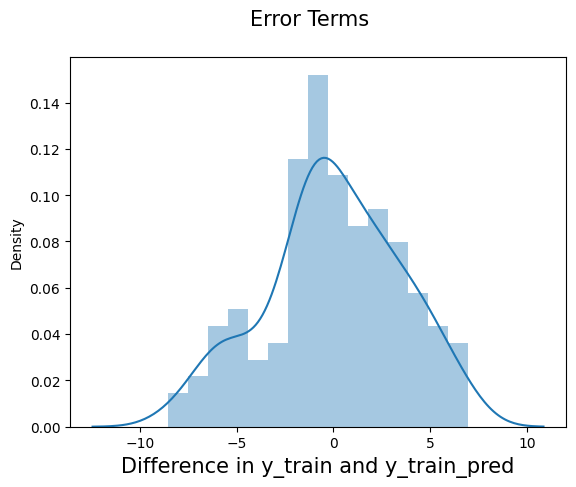

In [56]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

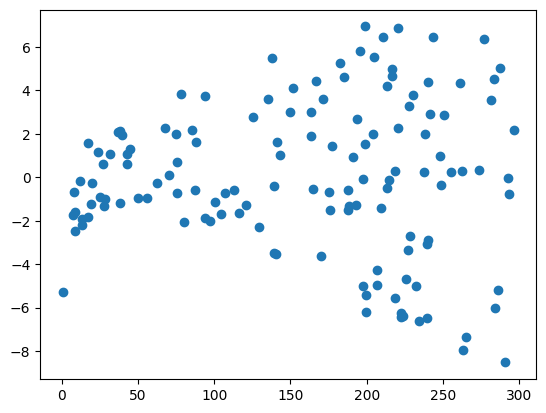

In [57]:
plt.scatter(x_train, res)
plt.show()

In [58]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [59]:
y_pred

array([ 9.5290264 , 10.66788643, 18.28183707,  7.07227159, 13.3882202 ,
        7.13692303,  9.83239087,  7.80333021, 10.51869079, 12.99036517,
       10.15564808, 10.58334223, 19.49032173, 20.80324333, 10.2700314 ,
       13.41805933, 12.69694708, 13.79104842, 20.82810927, 11.36413273,
       12.37368987, 11.65257763, 10.29987053,  9.09138587, 11.62771169,
       13.64185278, 17.79943785, 18.67471892, 10.66291324, 10.66788643,
       17.34687775, 15.44711998, 14.31820633, 17.58061758,  8.11664105,
       12.86106228, 14.65638311, 11.32932042,  9.27042063,  7.70883964,
        7.75857152, 14.19387664, 15.10397002, 17.6950009 ,  9.72795392,
       10.3098169 ,  7.30103823, 15.85989458, 12.32893118, 10.19543358,
        7.79835702, 11.70230951, 21.27569618, 12.84614272, 15.24321928,
       12.32893118, 20.14180934, 20.0771579 ,  8.14150699, 16.06379528,
       15.67091344, 13.54736221, 18.80899499, 20.62918175, 16.93907635,
       11.97583484])

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test,y_pred))

2.7721529431036243

In [61]:
r2 = r2_score(y_test,y_pred)
r2

0.5552549541159397

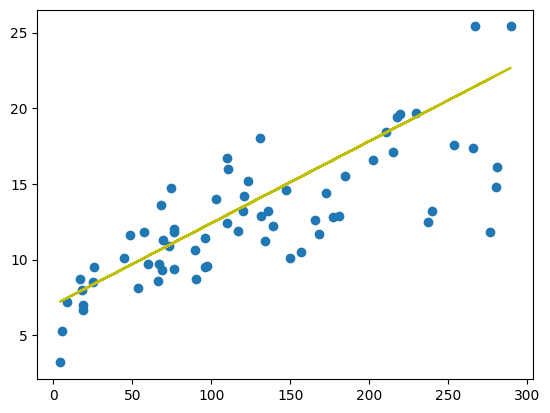

In [62]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955 + 0.0541 * x_test,'y')
plt.show()